### Project Name: Flight Prediction Analysis

### Project Objective:
- The number of people who fly has dramatically increased in recent years. Pricing alters dynamically owing to many variables, making it difficult for airlines to maintain prices. As a result, we will attempt to solve this problem by cleaning, preparing and analysing the flight price.
- Hence, the goal of this project is to clean, prepare and analyse the flight price dataset taken from Kaggle.
- Basically dataset have price based on information such as airline, date_of_journey, flight route information including number of stops and duration of flight.
- So that we can use this dataset to analyse the flight journey price based on a variety of variables as mentioned above. 


### Analysis Involve Phases:
1. Data collection
2. Data Understanding
3. Data Cleaning and Preparation 
4. Data Analyse

In [2]:
# importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Collection/Reading

In [3]:
final_df = pd.read_csv("flight_prediction.csv")

### Data Understanding

In [4]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
final_df = final_df.rename(columns={'Airline':'airline', 
                         'Date_of_Journey': 'date_of_journey', 
                         'Source': 'source', 
                         'Destination': 'destination', 
                         'Route': 'route',
                         'Dep_Time': 'dep_time', 
                         'Arrival_Time': 'arrival_time', 
                         'Duration':'duration', 
                         'Total_Stops': 'total_stops', 
                         'Additional_Info': 'additional_info',
                         'Price': 'price' 
                         })

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13354 non-null  object 
 1   date_of_journey  13354 non-null  object 
 2   source           13354 non-null  object 
 3   destination      13354 non-null  object 
 4   route            13353 non-null  object 
 5   dep_time         13354 non-null  object 
 6   arrival_time     13354 non-null  object 
 7   duration         13354 non-null  object 
 8   total_stops      13353 non-null  object 
 9   additional_info  13354 non-null  object 
 10  price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [8]:
final_df.shape

(13354, 11)

### Observations:
- Number of variables = 11
- Number of rows = 13354
- Number of categorical type of feature = 10
- Number of numerical type of feature = 1

In [18]:
final_df.isnull().sum()

airline               0
date_of_journey       0
source                0
destination           0
route                 1
dep_time              0
arrival_time          0
duration              0
total_stops           1
additional_info       0
price              2671
dtype: int64

In [32]:
final_df.additional_info.nunique()

10

### Observation:
  1. airline:
  - Depicts name of the airline from which the ticket is booked.
  - There are total 12 unique airline names in the dataset.
  - It is of Object datatype.
  
  
  2. date_of_journey:
  - Represents journey date of each traveller. 
  - It is a date column in MM/DD/YYYY format.
  - It It is of Object datatype.
  
  
  3. source:
  - Represents source from which the airline would departure.
  - There are total 5 unique source names in the dataset.
  - It is of Object datatype.
  
  
  4. destination:
  - Represents destination to which airline would arrive
  - There are total 6 unique destination names in the dataset.
  - It is of Object datatype.
  
  
  5. route:
  - Represents route of the airline from source to destination.
  - It is of Object datatype. 
  - There is one null value in the dataset.
  
  
  6. dep_time:
  - Represents time at which flight would departure from the source.
  - It is in H:MM format.
  - It is of Object datatype.
  
  
  7. arrival_time:
  - Represents time at which flight would arrive at the destination.
  - It is in H:MM format followed by date.
  - It is of Object datatype.
  
  
  8. duration: 
  - Represents duration that airline Takes to fly from source to destination..
  - It is of Object datatype. 
  
  
  9. total_stops:
  - Represents total no. of stops that airline takes between source and destination.
  - There are total 5 unique total stops in the dataset.
  - There is one null value in the dataset.
  - It is of Object datatype.
  
  
   10. additional_info:
  - Represents any Additional info about the airline.
  - There are total 10 unique additional information in the dataset.
  - It is of Object datatype.
  
  
   11. Price:
  - Represents fare of the ticket to fly from Source to destination.
  - It is of float datatype.

In [27]:
final_df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


### Data Preparation/Cleaning

In [10]:
def data_cleaning(dataframe):
    
    
    # By using lambda function -  split date_of_journey into date, month & year
    dataframe['date']= dataframe['date_of_journey'].apply(lambda x:x.split("/")[0])
    dataframe['month']= dataframe['date_of_journey'].apply(lambda x:x.split("/")[1])
    dataframe['year']= dataframe['date_of_journey'].apply(lambda x:x.split("/")[2])
    
    # or dataframe['Date']=dataframe['Date_of_Journey'].str.split('/').str[0]
    # or dataframe['Date']=dataframe['Date_of_Journey'].str.split('/').str[0]
    # or dataframe['Year']=dataframe['Date_of_Journey'].str.split('/').str[2]
    
    print("Split of date_of_journey - done")
    
    # To convert date Month and Year column to integer
    dataframe['date']=dataframe['date'].astype(int)
    dataframe['month']=dataframe['month'].astype(int)
    dataframe['year']=dataframe['year'].astype(int)
    print("Convert date, month and year into integer - done")
    
    # Dropping of Date_of_Journey column
    dataframe.drop('date_of_journey',axis=1,inplace=True)
    
    # Splitting Arrival Time column
    dataframe['arrival_time'].str.split(' ')
    
    # Here we have to focus on time not the date
    
    dataframe['arrival_time']=final_df['arrival_time'].apply(lambda x:x.split(' ')[0])
    
    # To split arrival time in hour and minutes
    dataframe['arrival_hour']=dataframe['arrival_time'].str.split(':').str[0]
    dataframe['arrival_min']=dataframe['arrival_time'].str.split(':').str[1]

    # To change 'Arrival_Min' and 'Arrival_Hour' in integer Data type
    dataframe['arrival_hour']=dataframe['arrival_hour'].astype(int)
    dataframe['arrival_min']=dataframe['arrival_min'].astype(int)

    # To drop Arrival_Time column
    dataframe.drop('arrival_time',axis=1,inplace=True)

    # To change Departure time by splitting time in hour and minutes

    dataframe['dept_hour']=dataframe['dep_time'].str.split(':').str[0]
    dataframe['dept_Min']=dataframe['dep_time'].str.split(':').str[1]

    # To change 'Dept_Hour' and 'Dept_min' in integer Data type
    dataframe['dept_hour']=dataframe['dept_hour'].astype(int)
    dataframe['dept_min']=dataframe['dept_min'].astype(int)

    # To drop Dep_Time column
    dataframe.drop('dep_time',axis=1,inplace=True)

    # Splitting Hours  from Duration column
    dataframe['duration_hour']=dataframe['duration'].str.split(' ').str[0].str.split('h').str[0]

    # We have '5m' in our dataset
    dataframe[final_df['duration_hour']=='5m']

     # Dropping 2 rows
    dataframe.drop(6474,axis=0,inplace=True)
    dataframe.drop(2660,axis=0,inplace=True)
    # Above records are incorrect because Mumbai to Hyderabad it is showing as 5 minutes which is inconsitent or not correct hence we are dropping above 2 rows
    
     return dataframe

In [ ]:
def data_preperation(dataframe)
   # Splitting Minutes from duration-(Data Preperation)
     final_df['duration_min']=final_df['duration'].str.split(' ').str[1].str.split('m').str[0]
        
    # We have replaced Nan values with 0
      final_df['duration_min']=final_df['duration_min'].fillna(0)
        
    # To check null values
     final_df['duration_min'].isnull().sum()
        
    # Dropping Duration column
     final_df.drop('duration',axis=1,inplace=True)
        
    # In route we have one Nan value to see which record is Nan we can use below code:
     final_df[final_df['total_stops'].isnull()]
        
    # To analyse total stops column
     final_df['total_stops'].unique()
        
    recode = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4, 'nan':1}
   
    final_df['total_stops'] = final_df['total_stops'].replace(recode)
    
    final_df['total_stops'].unique()
    
    # Filling Null values
    final_df['total_stops'] = final_df['total_stops'].fillna(1)
    
    final_df['total_stops'].unique()
    
    # To drop Dep_Time column
    final_df.drop('route',axis=1,inplace=True)
    
    # To handle categorical variable
    
    # To check unique values in below columns
    final_df['airline'].unique()
    final_df['source'].unique()
    final_df['destination'].unique()
    final_df['additional_info'].unique()
    
    # Here we can use label encoder for the above columns to convert categorical feature into numerical feature
    
    from sklearn.preprocessing import LabelEncoder
    
    # Create object of class LabelEncoder
    labelencoder=LabelEncoder()
    
    final_df['airline']=labelencoder.fit_transform(final_df['airline'])
    final_df['source']=labelencoder.fit_transform(final_df['source'])
    final_df['destination']=labelencoder.fit_transform(final_df['destination'])
    final_df['additional_info']=labelencoder.fit_transform(final_df['additional_info'])
    
    # Here we can see all columns are converted into object and float data type
    final_df.info()
            

### Data analysis

In [25]:
final_df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


### Q. 1.Top 10 Aviation Companies whose flight tickets are sold the most ?

In [33]:
final_df["airline"].value_counts()[0:10]

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Name: airline, dtype: int64

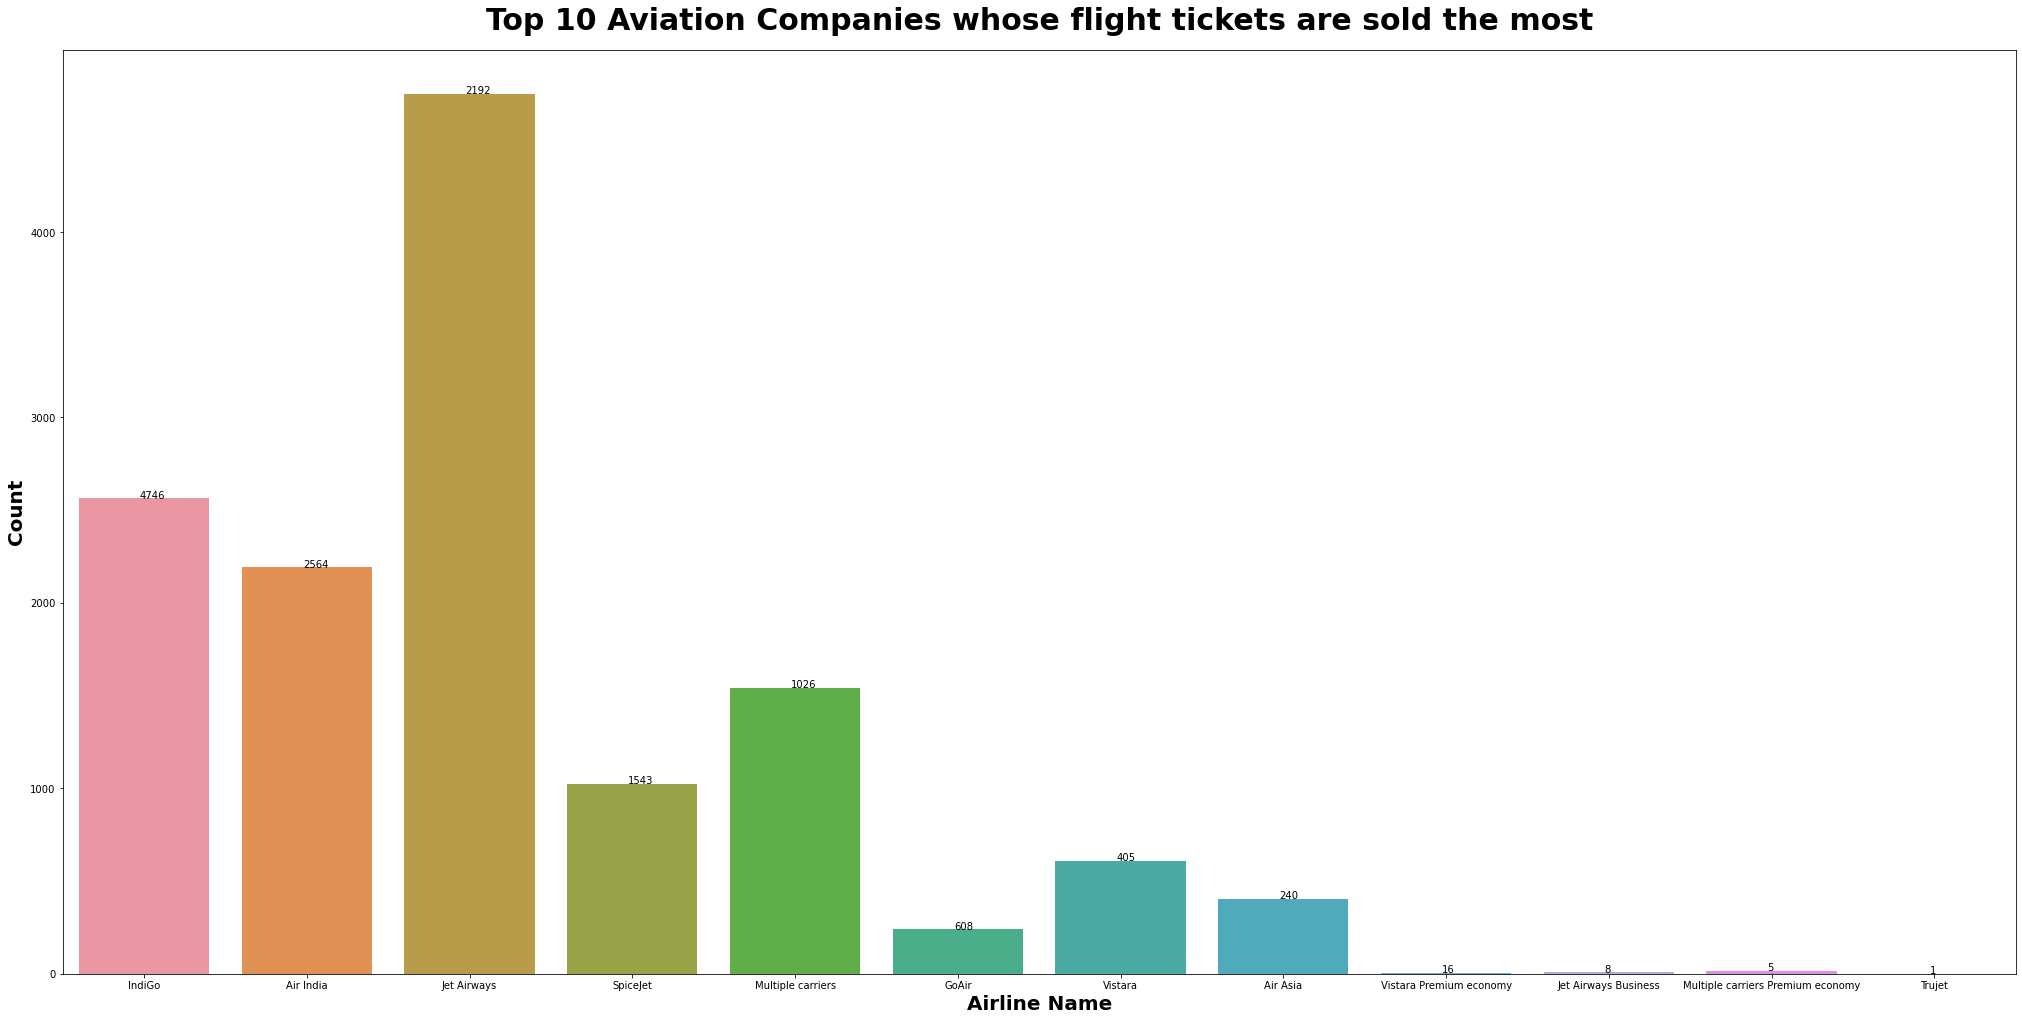

In [50]:
plt.figure(figsize=(35,17))
ax=sns.countplot(x='airline',data=final_df)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=20)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=30,pad=20)

for p, label in zip(ax.patches, final_df["airline"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.90))

### Observation:
- Of the total flight tickets sold Jet Airways has the highest share followed by Indigo.   

In [51]:
final_df[final_df.price.isin([Nan])].price.value_counts()

NameError: name 'Nan' is not defined

In [54]:
# To check how many null values are there
final_df['price'].isnull().sum()

2671

In [55]:
# To check which records are null
final_df[final_df['price'].isnull()]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
10683,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
10684,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
10685,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
10686,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
10687,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [63]:
final_df[final_df.price.isin(['NaN'])].airline.value_counts().values[0:12]

array([], dtype=int64)

In [68]:
## number of null prices for airlines
final_df[final_df.price.isnull()].airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: airline, dtype: int64

In [118]:
## number of null prices for airlines, source and destination
null_values_df = final_df[final_df.price.isnull()][['airline','source','destination','total_stops']].value_counts().to_frame().reset_index()
null_values_df.rename(columns={0:'null_values'}, inplace = True)

In [121]:
null_values_df.sort_values(by=['airline'], inplace= True)

In [122]:
not_null_values_df = final_df[final_df.price.notnull()][['airline','source','destination','total_stops']].value_counts().to_frame().reset_index()
not_null_values_df.rename(columns={0:'not_null_values'}, inplace = True)

In [124]:
null_values_df.shape

(72, 5)

In [125]:
not_null_values_df.shape

(81, 5)

In [126]:
factors=['airline','source','destination','total_stops']
pd.merge(not_null_values_df,null_values_df,on=factors, how='outer')

,airline,source,destination,total_stops,not_null_values,null_values
0,Jet Airways,Kolkata,Banglore,1 stop,1252.0,304.0
1,Multiple carriers,Delhi,Cochin,1 stop,1145.0,338.0
2,Jet Airways,Delhi,Cochin,1 stop,875.0,190.0
3,Jet Airways,Delhi,Cochin,2 stops,677.0,151.0
4,IndiGo,Delhi,Cochin,1 stop,628.0,172.0
...,...,...,...,...,...,...
77,IndiGo,Mumbai,Hyderabad,1 stop,1.0,1.0
78,SpiceJet,Mumbai,Hyderabad,1 stop,1.0,NaN
79,Air India,Banglore,New Delhi,4 stops,1.0,1.0
80,Vistara Premium economy,Chennai,Kolkata,non-stop,1.0,NaN


In [116]:
not_null_values_df.columns

Index(['airline', 'source', 'destination', 'total_stops', 'not_null_values'], dtype='object')

In [117]:
null_values_df.columns

Index(['airline', 'source', 'destination', 'total_stops', 'not_null_values'], dtype='object')